# One-Versus-All Support Vector Classification

In [2]:
pip install cvxopt

     |████████████████████████████████| 3.1 MB 323 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cvxopt as cvx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.spatial.distance as dt

## Importing Data

In [2]:
images = np.genfromtxt("hw06_images.csv", delimiter = ',')
labels = np.genfromtxt("hw06_labels.csv", delimiter = ',')

images_training = images[:1000,:]
images_test = images[1000:,:]
labels_training = labels[:1000].astype(int)
labels_test = labels[1000:].astype(int)

print(images_training.shape, labels_training.shape)
print(images_test.shape, labels_test.shape)

(1000, 784) (1000,)
(4000, 784) (4000,)


## Parameters

In [16]:
N_training = len(labels_training)
N_test = len(labels_test)
D = images_training.shape[1]
class_number = np.max(labels_training)

print(class_number)
print(N_training)
print(N_test)
print(D)

5
1000
4000
784


## Distance and Kernel Functions

In [4]:
def gaussian_kernel(X1, X2, s):
    dist = dt.cdist(X1, X2)
    K = np.exp(-dist**2 / (2 * s**2))
    return K

## Learning Algorithm

In [5]:
def learning_algorithm(s, C, Y, N, K):

    yyK = np.matmul(Y[:,None], Y[None,:]) * K
    
    epsilon = 1e-3
    
    P = cvx.matrix(yyK)
    q = cvx.matrix(-np.ones((N,1)))
    G = cvx.matrix(np.vstack((-np.eye(N), np.eye(N))))
    h = cvx.matrix(np.vstack((np.zeros((N,1)), C * np.ones((N,1)))))
    A = cvx.matrix(1.0 * Y[None,:])
    b = cvx.matrix(0.0)
    
    result = cvx.solvers.qp(P, q, G, h, A, b)
    alpha = np.reshape(result["x"], N)
    alpha[alpha < C*epsilon] = 0
    alpha[alpha > C*(1-epsilon)] = C
    
    support_indices, = np.where(alpha != 0)
    active_indices, = np.where(np.logical_and(alpha != 0, alpha < C))
    w0 = np.mean(Y[active_indices] * (1 - np.matmul(yyK[np.ix_(active_indices, support_indices)], alpha[support_indices])))
    
    return alpha, w0

## Prediction Function

In [6]:
def predict_y(s, C, N, K):

    f_predicted = np.empty((N, class_number))

    for i in range(class_number):
        y = np.array(labels_training)
        y[labels_training == i+1] = 1
        y[labels_training != i+1] = -1
        alpha, w0 = learning_algorithm(s, C, y, N_training, K_training)
        temp = np.matmul(K, y[:,None] * alpha[:,None]) + w0
        f_predicted[:,i] = temp[:,0]
    
    y_predicted = np.argmax(f_predicted, axis=1) + 1
    
    return y_predicted

## Prediction for Training Data

In [8]:
K_training = gaussian_kernel(images_training, images_training, 10)
y_predicted_training = predict_y(10, 10, N_training, K_training)

     pcost       dcost       gap    pres   dres
 0:  2.9600e+01 -4.2260e+04  8e+04  4e-01  3e-14
 1:  1.2992e+01 -7.4611e+03  8e+03  2e-02  3e-14
 2: -6.2643e+02 -2.9089e+03  2e+03  4e-03  2e-14
 3: -8.9105e+02 -1.7204e+03  8e+02  1e-03  3e-14
 4: -1.0255e+03 -1.3482e+03  3e+02  2e-04  3e-14
 5: -1.0893e+03 -1.1778e+03  9e+01  2e-05  3e-14
 6: -1.1096e+03 -1.1353e+03  3e+01  3e-07  4e-14
 7: -1.1169e+03 -1.1209e+03  4e+00  6e-14  4e-14
 8: -1.1184e+03 -1.1185e+03  1e-01  2e-16  3e-14
 9: -1.1185e+03 -1.1185e+03  4e-03  9e-14  4e-14
10: -1.1185e+03 -1.1185e+03  7e-05  1e-13  4e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9161e+02 -4.0951e+04  8e+04  4e-01  3e-14
 1:  1.7375e+02 -7.6611e+03  9e+03  2e-02  3e-14
 2: -4.0615e+02 -2.9616e+03  3e+03  6e-03  3e-14
 3: -6.2557e+02 -1.7531e+03  1e+03  2e-03  3e-14
 4: -7.5417e+02 -1.1618e+03  4e+02  4e-04  3e-14
 5: -8.2696e+02 -9.7495e+02  1e+02  2e-16  4e-14
 6: -8.5262e+02 -8.9665e+02  4e+01  1e-14  4e-1

## Prediction for Test Data

In [11]:
K_test = gaussian_kernel(images_test, images_training, 10)
y_predicted_test = predict_y(10, 10, N_test, K_test)

     pcost       dcost       gap    pres   dres
 0:  2.9600e+01 -4.2260e+04  8e+04  4e-01  3e-14
 1:  1.2992e+01 -7.4611e+03  8e+03  2e-02  3e-14
 2: -6.2643e+02 -2.9089e+03  2e+03  4e-03  2e-14
 3: -8.9105e+02 -1.7204e+03  8e+02  1e-03  3e-14
 4: -1.0255e+03 -1.3482e+03  3e+02  2e-04  3e-14
 5: -1.0893e+03 -1.1778e+03  9e+01  2e-05  3e-14
 6: -1.1096e+03 -1.1353e+03  3e+01  3e-07  4e-14
 7: -1.1169e+03 -1.1209e+03  4e+00  6e-14  4e-14
 8: -1.1184e+03 -1.1185e+03  1e-01  2e-16  3e-14
 9: -1.1185e+03 -1.1185e+03  4e-03  9e-14  4e-14
10: -1.1185e+03 -1.1185e+03  7e-05  1e-13  4e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9161e+02 -4.0951e+04  8e+04  4e-01  3e-14
 1:  1.7375e+02 -7.6611e+03  9e+03  2e-02  3e-14
 2: -4.0615e+02 -2.9616e+03  3e+03  6e-03  3e-14
 3: -6.2557e+02 -1.7531e+03  1e+03  2e-03  3e-14
 4: -7.5417e+02 -1.1618e+03  4e+02  4e-04  3e-14
 5: -8.2696e+02 -9.7495e+02  1e+02  2e-16  4e-14
 6: -8.5262e+02 -8.9665e+02  4e+01  1e-14  4e-1

## Confusion Matrix

In [19]:
confusion_matrix_training = pd.crosstab(np.reshape(y_predicted_training, N_training), labels_training, rownames = ['y_predicted'], colnames = ['y_train'])
accuracy_training = np.diag(confusion_matrix_training).sum() / confusion_matrix_training.to_numpy().sum()

print(confusion_matrix_training)

confusion_matrix_test = pd.crosstab(np.reshape(y_predicted_test, N_test), labels_test, rownames = ['y_predicted'], colnames = ['y_train'])
accuracy_test = np.diag(confusion_matrix_test).sum() / confusion_matrix_test.to_numpy().sum()

print(confusion_matrix_test)

y_train        1    2    3    4    5
y_predicted                         
1            209    0    0    0    6
2              0  202    0    0    0
3              0    0  209    0    0
4              0    0    0  201    0
5              0    0    0    0  173
y_train        1    2    3    4    5
y_predicted                         
1            594   33   16  130   53
2             29  638   38   39    6
3              9   66  621   95    6
4            154   58   89  537   15
5             14   15    7   22  716


## Accuracy for Different Reg. Parameters

In [14]:
s = 10
C = [0.1, 1, 10, 100, 1000]
accuracy_training = []
accuracy_test = []

for c in C:
    K_training = gaussian_kernel(images_training, images_training, s)
    y_predicted_training = predict_y(s, c, N_training, K_training)
    confusion_matrix_training = pd.crosstab(np.reshape(y_predicted_training, N_training), labels_training, rownames = ['y_predicted'], colnames = ['y_train'])
    accuracy_training.append(np.diag(confusion_matrix_training).sum() / confusion_matrix_training.to_numpy().sum())
    
    K_test = gaussian_kernel(images_test, images_training, s)
    y_predicted_test = predict_y(s, c, N_test, K_test)
    confusion_matrix_test = pd.crosstab(np.reshape(y_predicted_test, N_test), labels_test, rownames = ['y_predicted'], colnames = ['y_train'])
    accuracy_test.append(np.diag(confusion_matrix_test).sum() / confusion_matrix_test.to_numpy().sum())

     pcost       dcost       gap    pres   dres
 0: -1.3936e+02 -2.2047e+02  7e+03  3e+01  3e-15
 1: -3.4801e+01 -2.0264e+02  4e+02  9e-01  3e-15
 2: -2.8151e+01 -7.9601e+01  5e+01  3e-15  1e-15
 3: -3.1266e+01 -4.3423e+01  1e+01  1e-15  1e-15
 4: -3.2572e+01 -3.9120e+01  7e+00  1e-15  1e-15
 5: -3.3423e+01 -3.6637e+01  3e+00  3e-16  1e-15
 6: -3.3666e+01 -3.6029e+01  2e+00  6e-16  9e-16
 7: -3.4121e+01 -3.4971e+01  9e-01  6e-16  1e-15
 8: -3.4319e+01 -3.4585e+01  3e-01  1e-15  1e-15
 9: -3.4415e+01 -3.4445e+01  3e-02  9e-16  1e-15
10: -3.4429e+01 -3.4430e+01  1e-03  7e-16  1e-15
11: -3.4429e+01 -3.4429e+01  5e-05  2e-16  1e-15
12: -3.4429e+01 -3.4429e+01  1e-06  1e-15  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1812e+02 -2.1835e+02  7e+03  3e+01  3e-15
 1: -3.1287e+01 -2.0015e+02  5e+02  1e+00  3e-15
 2: -2.4529e+01 -8.1514e+01  6e+01  7e-16  2e-15
 3: -2.7550e+01 -4.0807e+01  1e+01  2e-15  1e-15
 4: -2.8779e+01 -3.6453e+01  8e+00  7e-16  1e-1

     pcost       dcost       gap    pres   dres
 0: -2.4204e+02 -2.0091e+03  9e+03  2e+00  5e-15
 1: -1.7430e+02 -1.1634e+03  1e+03  2e-01  5e-15
 2: -1.8267e+02 -3.7017e+02  2e+02  2e-02  4e-15
 3: -2.0759e+02 -2.8238e+02  8e+01  7e-03  4e-15
 4: -2.2023e+02 -2.4918e+02  3e+01  2e-03  5e-15
 5: -2.2599e+02 -2.3687e+02  1e+01  5e-04  5e-15
 6: -2.2900e+02 -2.3116e+02  2e+00  8e-06  6e-15
 7: -2.2979e+02 -2.3006e+02  3e-01  3e-07  6e-15
 8: -2.2991e+02 -2.2992e+02  8e-03  7e-09  7e-15
 9: -2.2991e+02 -2.2991e+02  1e-04  9e-11  7e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.8414e+02 -2.5198e+03  1e+04  3e+00  7e-15
 1: -2.7755e+02 -1.6247e+03  2e+03  1e-01  8e-15
 2: -2.9348e+02 -5.5037e+02  3e+02  2e-02  6e-15
 3: -3.3137e+02 -4.1468e+02  9e+01  5e-03  7e-15
 4: -3.4285e+02 -3.8717e+02  5e+01  2e-03  6e-15
 5: -3.5203e+02 -3.6508e+02  1e+01  5e-04  7e-15
 6: -3.5545e+02 -3.5846e+02  3e+00  7e-15  8e-15
 7: -3.5640e+02 -3.5706e+02  7e-01  6e-15  7e-1

 6: -1.1096e+03 -1.1353e+03  3e+01  3e-07  4e-14
 7: -1.1169e+03 -1.1209e+03  4e+00  6e-14  4e-14
 8: -1.1184e+03 -1.1185e+03  1e-01  2e-16  3e-14
 9: -1.1185e+03 -1.1185e+03  4e-03  9e-14  4e-14
10: -1.1185e+03 -1.1185e+03  7e-05  1e-13  4e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9161e+02 -4.0951e+04  8e+04  4e-01  3e-14
 1:  1.7375e+02 -7.6611e+03  9e+03  2e-02  3e-14
 2: -4.0615e+02 -2.9616e+03  3e+03  6e-03  3e-14
 3: -6.2557e+02 -1.7531e+03  1e+03  2e-03  3e-14
 4: -7.5417e+02 -1.1618e+03  4e+02  4e-04  3e-14
 5: -8.2696e+02 -9.7495e+02  1e+02  2e-16  4e-14
 6: -8.5262e+02 -8.9665e+02  4e+01  1e-14  4e-14
 7: -8.6181e+02 -8.7420e+02  1e+01  1e-13  4e-14
 8: -8.6497e+02 -8.6821e+02  3e+00  4e-14  4e-14
 9: -8.6600e+02 -8.6646e+02  5e-01  4e-14  4e-14
10: -8.6615e+02 -8.6622e+02  7e-02  3e-14  4e-14
11: -8.6618e+02 -8.6618e+02  9e-04  4e-14  4e-14
12: -8.6618e+02 -8.6618e+02  1e-05  2e-13  4e-14
Optimal solution found.
     pcost       dcost

12: -1.4666e+03 -1.4677e+03  1e+00  1e-13  1e-13
13: -1.4670e+03 -1.4670e+03  2e-02  3e-14  1e-13
14: -1.4670e+03 -1.4670e+03  1e-03  9e-14  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3419e+05 -3.8785e+06  7e+06  3e-01  3e-13
 1:  1.2861e+05 -6.0777e+05  8e+05  2e-02  3e-13
 2:  4.3601e+04 -1.6317e+05  2e+05  3e-03  2e-13
 3:  1.2701e+04 -5.5686e+04  7e+04  6e-04  2e-13
 4:  3.1163e+03 -2.1309e+04  2e+04  1e-04  2e-13
 5: -8.6396e+01 -8.2594e+03  8e+03  2e-05  2e-13
 6: -1.1139e+03 -3.5320e+03  2e+03  1e-13  2e-13
 7: -1.4265e+03 -2.1920e+03  8e+02  1e-13  1e-13
 8: -1.5583e+03 -1.7837e+03  2e+02  2e-13  2e-13
 9: -1.6067e+03 -1.6486e+03  4e+01  1e-13  1e-13
10: -1.6166e+03 -1.6279e+03  1e+01  3e-14  1e-13
11: -1.6199e+03 -1.6213e+03  1e+00  1e-13  1e-13
12: -1.6204e+03 -1.6204e+03  2e-02  3e-14  1e-13
13: -1.6204e+03 -1.6204e+03  4e-04  1e-13  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4343e+05 -3.7801

 3:  1.4088e+06 -4.6191e+06  6e+06  8e-04  2e-12
 4:  5.8080e+05 -2.8798e+06  3e+06  7e-13  1e-12
 5:  2.9732e+05 -1.4536e+06  2e+06  5e-13  8e-13
 6:  1.2876e+05 -5.6724e+05  7e+05  7e-13  6e-13
 7:  2.0227e+04 -5.0019e+04  7e+04  1e-12  4e-13
 8:  1.6395e+03 -6.8793e+03  9e+03  6e-13  2e-13
 9: -5.1213e+02 -3.1334e+03  3e+03  6e-14  1e-13
10: -1.1130e+03 -2.1183e+03  1e+03  3e-14  1e-13
11: -1.3309e+03 -1.7368e+03  4e+02  8e-14  1e-13
12: -1.4110e+03 -1.5892e+03  2e+02  5e-14  1e-13
13: -1.4469e+03 -1.5131e+03  7e+01  1e-13  1e-13
14: -1.4625e+03 -1.4758e+03  1e+01  2e-13  1e-13
15: -1.4665e+03 -1.4678e+03  1e+00  3e-13  1e-13
16: -1.4670e+03 -1.4670e+03  3e-02  1e-13  1e-13
17: -1.4670e+03 -1.4670e+03  2e-03  4e-14  1e-13
18: -1.4670e+03 -1.4670e+03  2e-05  2e-13  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4522e+07 -3.7535e+08  7e+08  3e-01  3e-12
 1:  1.3516e+07 -5.8347e+07  8e+07  2e-02  1e-11
 2:  5.0078e+06 -1.5793e+07  2e+07  4e-03  3e-

## Accuracy Plot 

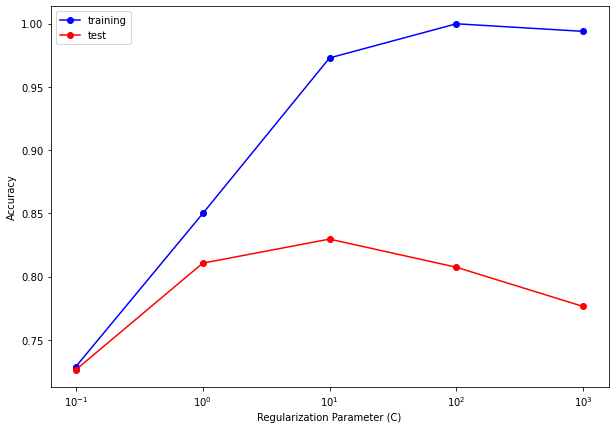

In [15]:
plt.figure(figsize = (10,7))
C_graph = ['$10^{-1}$', '$10^0$', '$10^1$', '$10^2$', '$10^3$']
plt.plot(C_graph, accuracy_training, 'bo-', label = 'training')
plt.plot(C_graph, accuracy_test, 'ro-', label = 'test')
plt.legend(loc="upper left")
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Accuracy")
plt.show()